In [1]:
%cd ..

/home/dani2442/Projects/bifurcationjax


In [2]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

from bifurcationjax.continuation.Corrector import NaturalCorrector
from bifurcationjax.continuation.Predictor import SecantPredictor
from bifurcationjax.continuation.Continuation import continuation
from bifurcationjax.BifurcationProblem import BifurcationProblem

\begin{equation}
\begin{cases}
x' = -x - y\\
y' = -p*z + r*y + s*z^2 - y*z^2\\
z' = -q(x + z)
\end{cases}
\end{equation}

In [3]:
@jax.jit
def maasch_rule(u, p):
    x, y, z = u[...,0], u[...,1], u[...,2]
    q, r, s, = 1.2, 0.8, 0.8
    dx = -x - y
    dy = -p*z + r*y + s*z*z - z*z*y
    dz = -q*(x + z)
    return jnp.stack([dx, dy, dz], axis=-1)

In [4]:
p_min = -0.1
p_max = 2
delta = 0.9
p0 = 0.0
x0 = jnp.array([-1.4, -1.4, -1.4])
dp0 = 0.02
dx0 = jnp.array([0.01, 0.01, 0.01])

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [5]:
dz0 = jnp.append(dx0, dp0)

In [9]:
prob = BifurcationProblem(maasch_rule, x0, p0, dx0, dp0)
correction = NaturalCorrector()
prediction = SecantPredictor(dz0)
xs, ps, stability = continuation(prob, prediction, correction, p_min, p_max, dsmax=0.1)

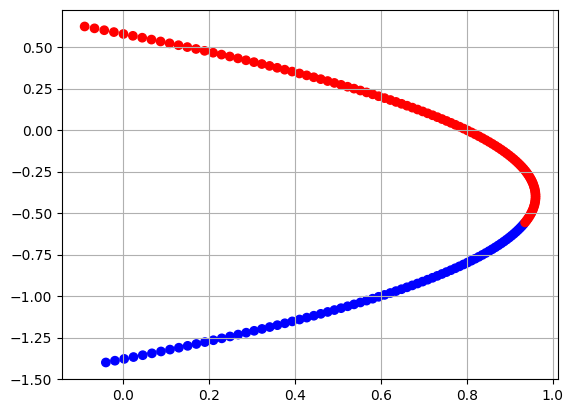

In [10]:
colors = ["blue" if s else "red" for s in stability]

plt.scatter(ps, [x[0] for x in xs], c=colors)
plt.grid()
plt.show()